In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [2]:
#0-not fraud trans
#1- fraud trans

In [3]:
data=pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.select_dtypes("object")#no objects

""
0
1
2
3
4
...
284802
284803
284804
284805


In [9]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
count=0
nf=data["Class"]
for i in range(len(nf)):
    if nf[i]==0:
        count=count+1

per=(count/len(nf))*100
print(per)

99.82725143693798


In [11]:
count=0
f=data["Class"]
for i in range(len(nf)):
    if f[i]==1:
        count=count+1

per=(count/len(f))*100
print(per)

0.1727485630620034


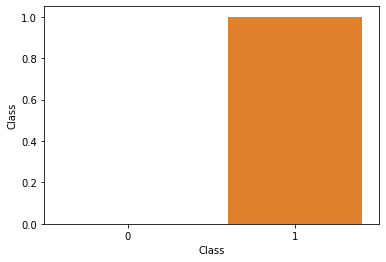

In [12]:
sns.barplot(x=f,y=nf,data=data)

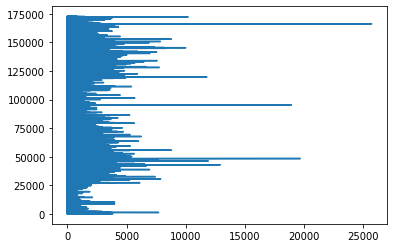

In [13]:
a=data["Amount"]
b=data["Time"]
plt.plot(a,b)

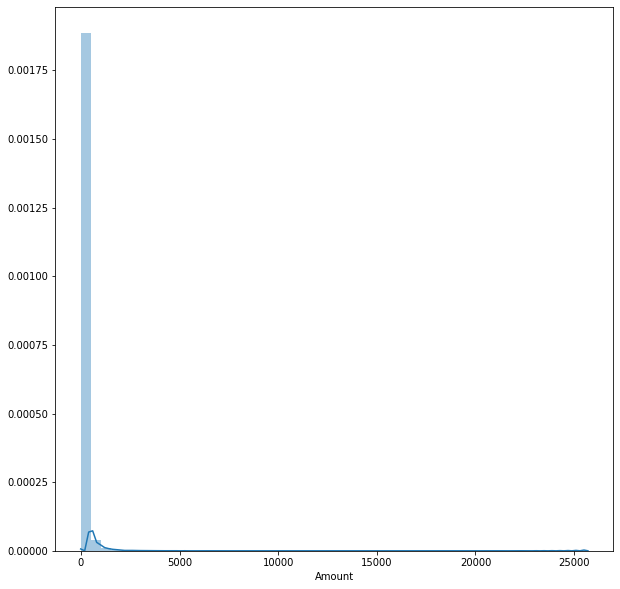

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(data["Amount"])

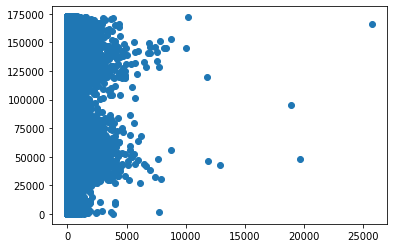

In [15]:
plt.scatter(data["Amount"],data["Time"])
plt.show()

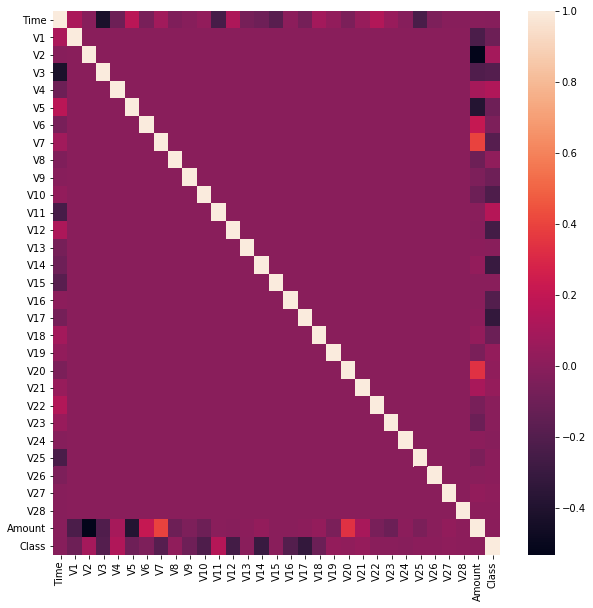

In [17]:
a=data.corr()
b=a.index
plt.figure(figsize=(10,10))
s=sns.heatmap(data[b].corr())

In [18]:
x=data.drop(["Class"],axis=1)
y=data["Class"]

In [19]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [20]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
model=ExtraTreesClassifier()

In [23]:
model.fit(x,y)
model.feature_importances_

array([0.01776111, 0.01194969, 0.01238388, 0.03430697, 0.03827812,
       0.0132846 , 0.01375624, 0.02462219, 0.01344431, 0.02829386,
       0.06898322, 0.07224742, 0.09162009, 0.0115186 , 0.12722243,
       0.01224603, 0.07196875, 0.15001232, 0.04772916, 0.01388555,
       0.01385406, 0.01560655, 0.01176206, 0.00911935, 0.01257834,
       0.01093181, 0.01472581, 0.01216001, 0.01149389, 0.0122536 ])

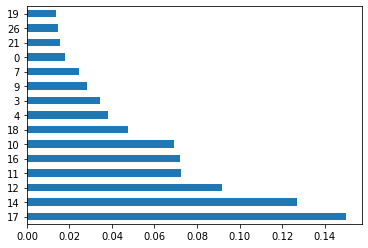

In [24]:
fet=pd.Series(model.feature_importances_)
fet.nlargest(15).plot(kind='barh')
plt.show()

In [25]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
print(x_train,y_train)

            Time        V1        V2        V3        V4        V5        V6  \
266943  162547.0 -0.608674  0.265461 -0.671828 -1.737780  0.476494 -1.149065   
59045    48668.0  1.186315 -0.907449  1.032778 -0.547520 -1.563387 -0.434951   
60527    49367.0 -3.234359 -3.552772  1.464939  2.416094  3.570486 -2.499745   
137627   82253.0  1.025261 -1.248304  0.180253 -0.586194 -1.255391 -0.636499   
112035   72484.0  1.420408 -0.927403  0.289425 -1.522476 -1.107289 -0.382217   
...          ...       ...       ...       ...       ...       ...       ...   
207916  136886.0  2.040090 -0.116944 -1.793956  0.273961  0.420429 -0.640850   
87574    61744.0 -1.610993  1.807188  0.330383  3.360888 -0.628808  0.822545   
112638   72738.0  1.152883  0.052283  1.306601  1.330639 -0.874531 -0.168837   
3315      2866.0  1.020962 -0.130374  0.550700  0.704957  0.080658  1.127452   
29497    35497.0 -0.758413 -3.690013 -2.747876 -0.062003  1.041266  3.540411   

              V7        V8        V9  .

In [26]:
cls=LogisticRegression()
cls.fit(x_train,y_train)

pre=cls.predict(x_test)

C:\Users\Ranjith ch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
y_test

95069     0
173945    0
64780     0
245756    0
111192    0
         ..
178034    0
229814    0
28009     0
114222    0
107552    0
Name: Class, Length: 28481, dtype: int64

In [29]:
print(sklearn.metrics.accuracy_score(y_test,pre))
print(sklearn.metrics.classification_report(y_test,pre))

0.9990519995786665
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28430
           1       0.74      0.73      0.73        51

    accuracy                           1.00     28481
   macro avg       0.87      0.86      0.87     28481
weighted avg       1.00      1.00      1.00     28481



In [40]:
print(sklearn.metrics.confusion_matrix(y_test,pre))

[[28417    13]
 [   14    37]]


In [41]:
cls1=DecisionTreeClassifier()
cls1.fit(x_train,y_train)

pre1=cls1.predict(x_test)

In [42]:
pre1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
print(sklearn.metrics.accuracy_score(y_test,pre))
print(sklearn.metrics.classification_report(y_test,pre))

0.9990519995786665
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28430
           1       0.74      0.73      0.73        51

    accuracy                           1.00     28481
   macro avg       0.87      0.86      0.87     28481
weighted avg       1.00      1.00      1.00     28481



In [44]:
from sklearn import tree

[Text(70.73869109970572, 212.91, 'X[17] <= -2.751\ngini = 0.003\nsamples = 256326\nvalue = [255885, 441]'),
 Text(52.39695067264574, 203.85, 'X[12] <= -2.181\ngini = 0.367\nsamples = 397\nvalue = [96, 301]'),
 Text(41.136860986547084, 194.79, 'X[14] <= -3.43\ngini = 0.301\nsamples = 368\nvalue = [68, 300]'),
 Text(25.823139013452913, 185.73, 'X[26] <= -0.264\ngini = 0.232\nsamples = 328\nvalue = [44, 284]'),
 Text(18.01614349775785, 176.67, 'X[27] <= 1.077\ngini = 0.456\nsamples = 91\nvalue = [32, 59]'),
 Text(9.608609865470852, 167.60999999999999, 'X[5] <= -0.013\ngini = 0.153\nsamples = 60\nvalue = [5, 55]'),
 Text(4.804304932735426, 158.55, 'X[19] <= 2.539\ngini = 0.037\nsamples = 53\nvalue = [1, 52]'),
 Text(2.402152466367713, 149.49, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]'),
 Text(7.206457399103138, 149.49, 'X[14] <= -8.242\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(4.804304932735426, 140.43, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(9.608609865470852, 140.43,

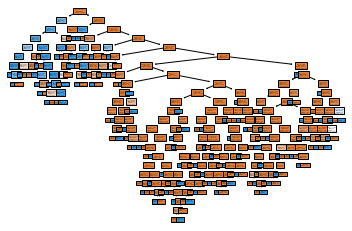

In [45]:
tree.plot_tree(cls1,filled=True)

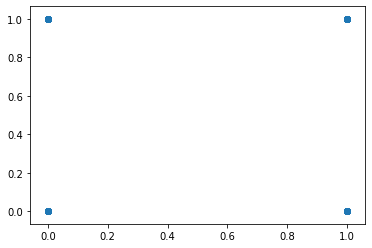

In [46]:
plt.scatter(y_test,pre)

<BarContainer object of 28481 artists>

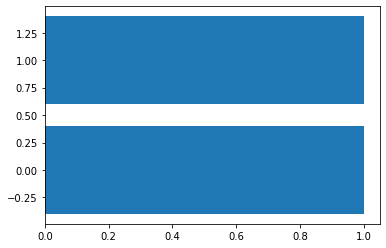

In [47]:
plt.barh(y_test,pre)